In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/FIN protein data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import module for data manipulation
import pandas as pd

# Import module for linear algebra
import numpy as np

# Import module for data visualization
from plotnine import *
import plotnine

# Data visualization with matplotlib
import matplotlib.pyplot as plt

# Use the theme of ggplot
plt.style.use('ggplot')

# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [ ]:
df = pd.read_csv('locardses.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36312 entries, 0 to 36311
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36312 non-null  int64  
 1   postalc              36274 non-null  float64
 2   gender               36312 non-null  object 
 3   age                  36312 non-null  int64  
 4   marital-status       36312 non-null  object 
 5   highest-edu          36312 non-null  object 
 6   loyalty-share        36312 non-null  int64  
 7   hh-income            36312 non-null  object 
 8   hh-expense-coverage  36312 non-null  object 
 9   weight               36312 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.8+ MB


In [ ]:
df = df.astype({'id': object})

In [ ]:
# Select the unique value each categorical columns
df.select_dtypes('object').nunique()

id                     36312
gender                     2
marital-status             5
highest-edu                5
hh-income                  8
hh-expense-coverage        6
dtype: int64

In [ ]:
# Select the categorical columns
cols = df.select_dtypes('object').columns
df_cat = df[cols]
# Show the data
df_cat.head()

,id,gender,marital-status,highest-edu,hh-income,hh-expense-coverage
0,2.0,male,married,tertiary,five,four
1,3.0,female,married,university,seven,four
2,4.0,male,married,secondary,three,three
3,5.0,male,cohabit,tertiary,three,four
4,6.0,male,married,university,seven,four


In [ ]:
#drop variables not ses
cols = df_cat.drop(['gender','marital-status'],axis=1)

In [ ]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36312 entries, 0 to 36311
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   36312 non-null  object
 1   highest-edu          36312 non-null  object
 2   hh-income            36312 non-null  object
 3   hh-expense-coverage  36312 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [ ]:
df_cat=cols

In [ ]:
# Check missing value
df_cat.isna().sum()

id                     0
highest-edu            0
hh-income              0
hh-expense-coverage    0
dtype: int64

In [ ]:
# Convert dataframe to matrix
dfMatrix = df_cat.loc[:, df_cat.columns != 'id'].to_numpy()
dfMatrix

array([['tertiary', 'five', 'four'],
       ['university', 'seven', 'four'],
       ['secondary', 'three', 'three'],
       ...,
       ['tertiary', 'four', 'three'],
       ['secondary', 'two', 'three'],
       ['secondary', 'one', 'two']], dtype=object)

In [ ]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


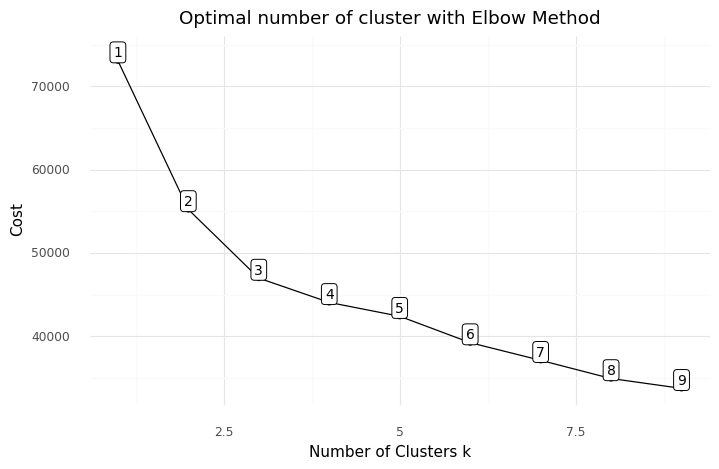

<ggplot: (8772010011757)>

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

We selected three clusters based on the elbow method, which evaluates the sum of squared errors (SSE) for different values of k. This method identifies the point at which adding more clusters yields only marginal improvements in model fit. In other words, we choose k at the inflection point—where the SSE curve begins to flatten—indicating diminishing returns in explained variance.

In [ ]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

array([0, 2, 1, ..., 0, 1, 1], dtype=uint16)

In [ ]:
# Cluster centorid
kmodes.cluster_centroids_

# Check the iteration of the clusters created
kmodes.n_iter_

# Check the cost of the clusters created
kmodes.cost_

47000.0

In [ ]:
# Add the cluster to the dataframe
df_cat['Cluster Labels'] = kmodes.labels_
df_cat['Segment'] = df_cat['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

# Order the cluster
df_cat['Segment'] = df_cat['Segment'].astype('category')
df_cat['Segment'] = df_cat['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

In [ ]:
# Columns for centroids
list_col = ['id', 'Cluster Labels', 'Segment']
cols = [col for col in df_cat if col not in list_col]

#Create an index for cluster interpretation
index = ['First Cluster', 'Second Cluster', 'Third Cluster']

# Create the data frame
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,highest-edu,hh-income,hh-expense-coverage
First Cluster,tertiary,three,four
Second Cluster,secondary,two,three
Third Cluster,university,four,four


In [ ]:
df_cat.head()

,id,highest-edu,hh-income,hh-expense-coverage,Cluster Labels,Segment
0,2.0,tertiary,five,four,0,First
1,3.0,university,seven,four,2,Third
2,4.0,secondary,three,three,1,Second
3,5.0,tertiary,three,four,0,First
4,6.0,university,seven,four,2,Third


** Note to reorder the clusters because not from lowest to highest SES (currently reverse coded)

In [ ]:
df_cat.to_csv('locard-individual-withcluster.csv')